# <center>Machine Learning - TME</center>
<right>*&copy; Hider TOULA & Abdellah BOUSBA.*</right>

In [2]:
import utils as ut

TME1 - Arbres de décision, sélection de modèles
--------


<font color="RED" size="+1">Question 1.1 :</font>

In [2]:
t1 = [6,6,6,6,6,6]
t2 = [6,6,6,6,6,9]
t3 = [6,9,6,9,6,9]

print('entropie de t1 : ', ut.entropie(t1))
print('entropie de t2 : ', ut.entropie(t2))
print('entropie de t3 : ', ut.entropie(t3))

entropie de t1 :  -0.0
entropie de t2 :  0.45056120886630463
entropie de t3 :  0.6931471805599453


<font color="RED" size="+1">Question 1.2 :</font>

In [3]:
ut.entropie_cond([t1,t2,t3])

0.38123612980875

<font color="RED" size="+1">Question 1.3 :</font>

In [4]:
[ data , id2titles , fields ]= ut.pickle.load (open("data/imdb_extrait.pkl","rb"))
datax = data [: ,:32]
datay = ut.np.array ([1 if x[33] >6.5 else -1 for x in data ])

In [5]:
listeE, listeEC = ut.getEntropies(datax,datay,fields)

attribut : Sci-Fi
	entropie = 0.6840731540145955
	entropie conditonnelle = 0.6799402806092876
	difference =  -0.00413287340530788
attribut : Crime
	entropie = 0.6840731540145955
	entropie conditonnelle = 0.6836092907830238
	difference =  -0.00046386323157165954
attribut : Romance
	entropie = 0.6840731540145955
	entropie conditonnelle = 0.6840711988780971
	difference =  -1.9551364983660946e-06
attribut : Animation
	entropie = 0.6840731540145955
	entropie conditonnelle = 0.6825230243876741
	difference =  -0.0015501296269213594
attribut : Music
	entropie = 0.6840731540145955
	entropie conditonnelle = 0.6840615675797059
	difference =  -1.1586434889521158e-05
attribut : Comedy
	entropie = 0.6840731540145955
	entropie conditonnelle = 0.6729819945731972
	difference =  -0.011091159441398268
attribut : War
	entropie = 0.6840731540145955
	entropie conditonnelle = 0.6777655712037746
	difference =  -0.006307582810820889
attribut : Horror
	entropie = 0.6840731540145955
	entropie conditonnelle = 0.6

    une difference nulle 0 signifie que les valeurs sont identique, et si elle est egale a 1 veut dire que les valeurs sont équitablement distribuées (desordre le plus grand). comme l'attribut Drama a un gain max de 0.042048 on le choisit pour commencer.


<font color="RED" size="+1">Question 1.4 :</font>

In [6]:
ut.generateDT(datax,datay,fields)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.971767 to fit
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.669849 to fit
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.654398 to fit
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.656298 to fit
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.645999 to fit


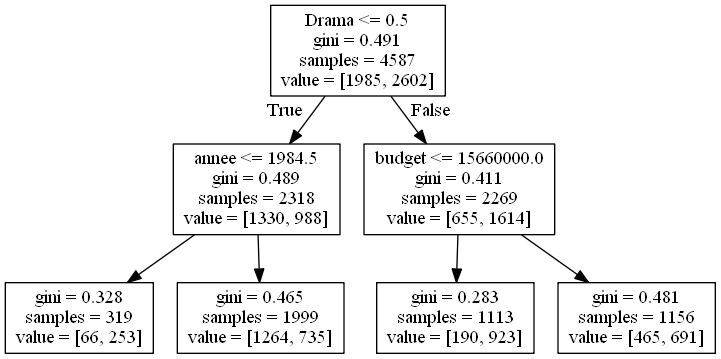

In [7]:
ut.Image("data/tree2.png")

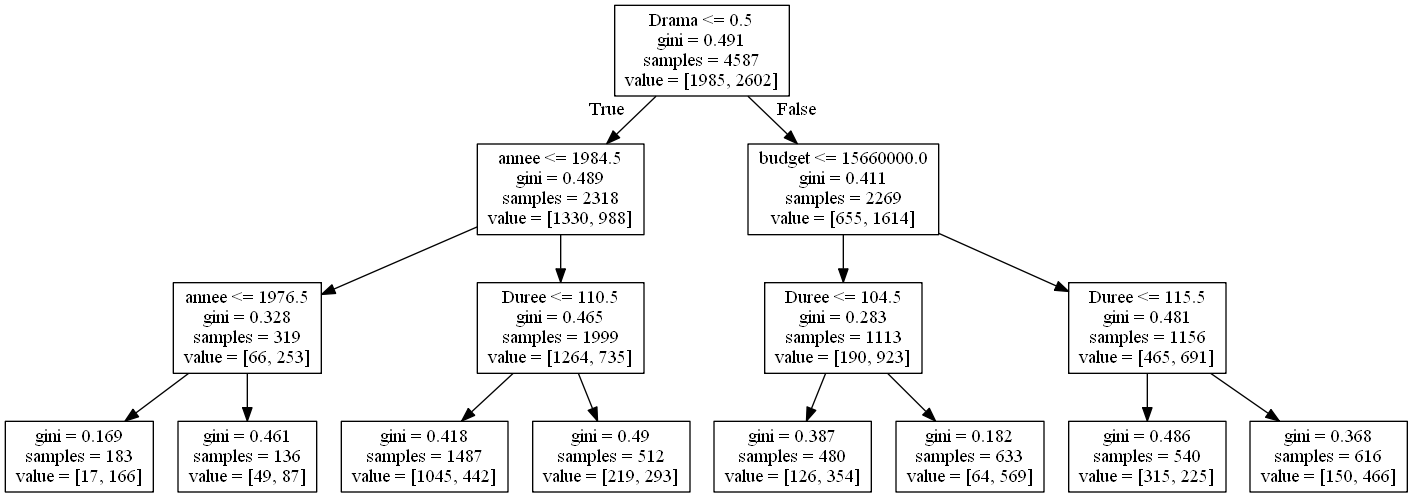

In [8]:
ut.Image("data/tree3.png")

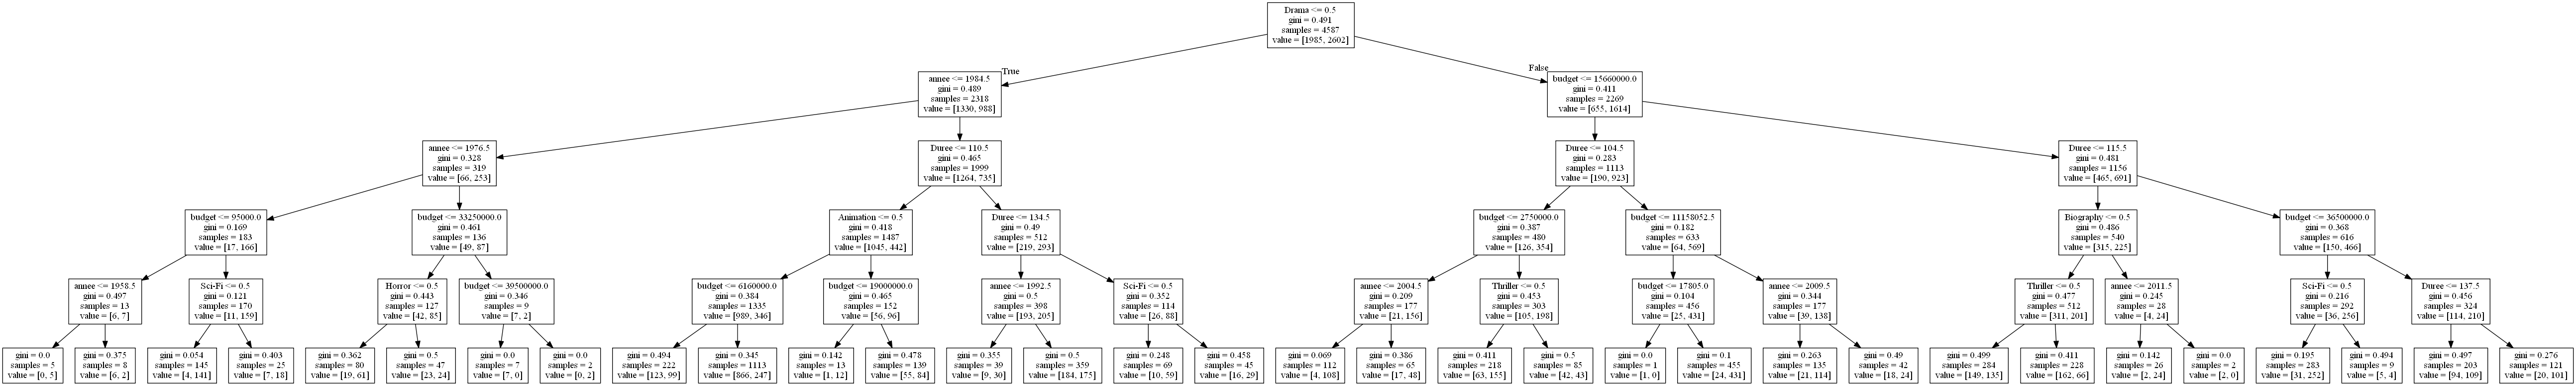

In [9]:
ut.Image("data/tree5.png")

    en comparant l'arbre de profondeur = 2 et = 3 on remarque que le nombre d'exemple est divisé par 2 a chaque niveau ce qui est logique car on est dans une arbre binaire 

<font color="RED" size="+1">Question 1.5 :</font>

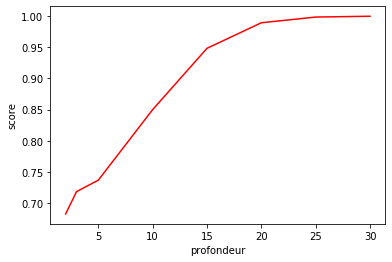

In [10]:
ut.getScorces(datax,datay,fields)

    on remarque que le score augmente en fonction de la profondeur ce qui est logique car plus la profondeur augmente, plus de feuille sont cree donc plus de precision.

<font color="RED" size="+1">Question 1.6 :</font>

    les scores ne sont pas des indicateurs fiables, car le teste se fait sur les données d'apprentisage. Dans le cas ou la profondeur est grande on avoir du sur-apprentissage. Une solution est de separer les données en deux ensemble pour learn et test.


<font color="RED" size="+1">Question 1.7 :</font>

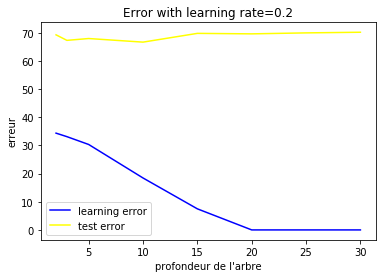

In [11]:
ut.getError(datax, datay, 0.2)

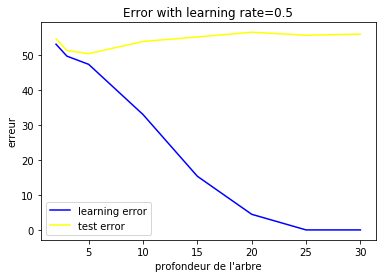

In [12]:
ut.getError(datax, datay, 0.5)

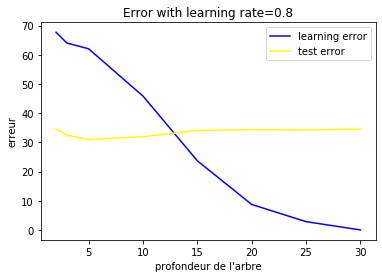

In [13]:
ut.getError(datax, datay, 0.8)

<font color="RED" size="+1">Question 1.8 :</font>

    quand il y a peu d’exemples d’apprentissage, l'erreur de test est trés élevé, et celle d'apprentissage est petite a cause du sur-apprentissage ce qui est logique car la taille des données en entré est petite donc le modele ne marchera pas bien avec les nouveau données. par contre quand il y a beaucoup d’exemples d’apprentissage  l'erreur de test est entre 30% et 40% ce qui est acceptable par rapport a 70% de la partition precedante, en outre l'erreur d'apprentissage est plus élevé et a partir de la pronfondeur 15 on remarque des bons resultats et on peut attendre une performence moyenne.

<font color="RED" size="+1">Question 1.9 :</font>

    Comme on a peu de donnée, les resultats ne seront pas trés fiables avec n'import quelle partition, une amelioration serait de utiliser la validation croisée.

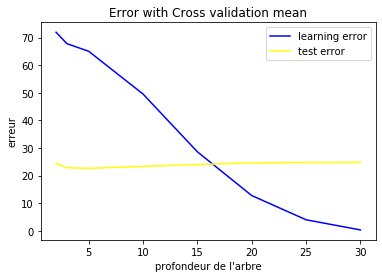

In [14]:
ut.crossValidationError(datax, datay, 10)

TME2 - Estimation de densité
--------


<font color="RED" size="+1">Données : API Google Places, Points d’intérêt de Paris</font>

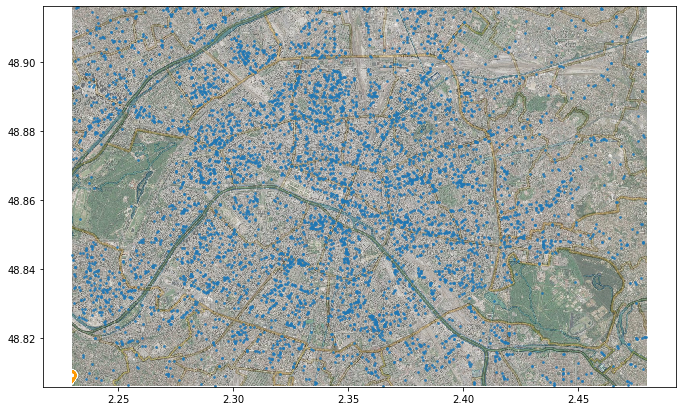

In [15]:
ut.plt.ion()
# Liste des POIs : furniture_store, laundry, bakery, cafe, home_goods_store, clothing_store, atm, lodging, night_club, convenience_store, restaurant, bar
# La fonction charge la localisation des POIs dans geo_mat et leur note.
geo_mat, notes = ut.load_poi("bar")

# Affiche la carte de Paris
ut.plt.figure(figsize=(12,7))
ut.show_img()
# Affiche les POIs
ut.plt.scatter(geo_mat[:,0],geo_mat[:,1],alpha=0.8,s=3)


<font color="RED" size="+1">Méthode par histogramme et Méthodes à noyaux</font>

In [16]:
histo = ut.Histogramme(10)
histo.fit(geo_mat)
histo.score(geo_mat)

18897.828080995117

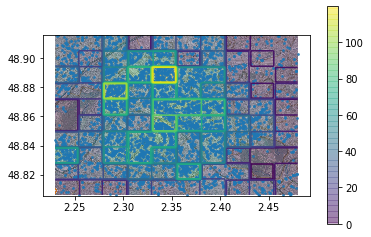

In [17]:
ut.show_density(histo, geo_mat, steps=100, log=False)

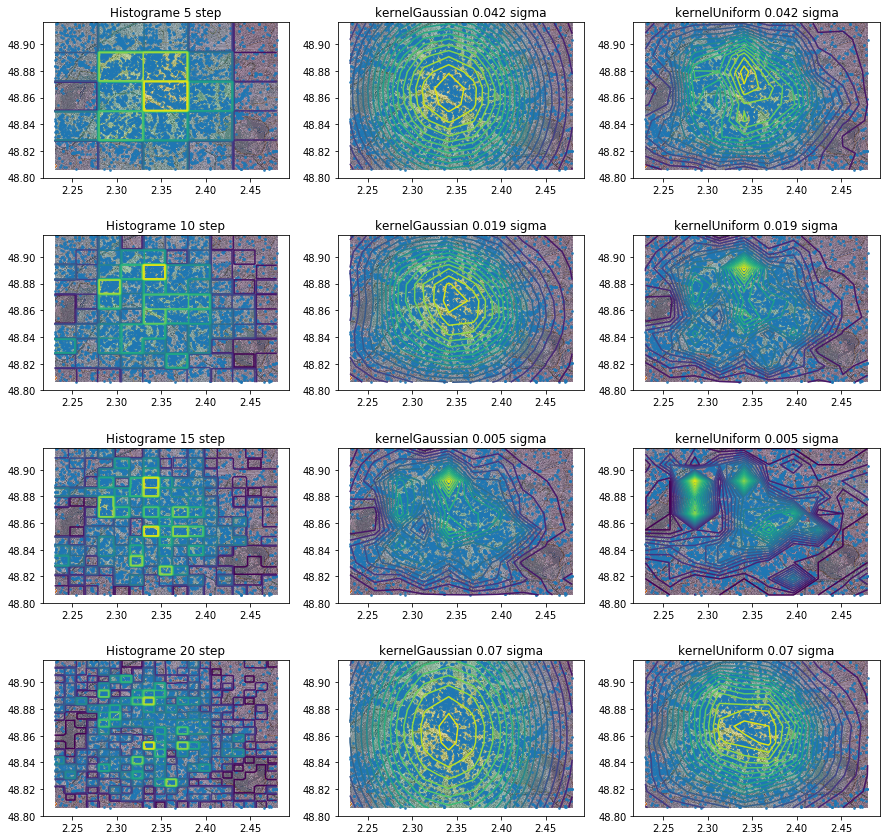

In [18]:
fig, axes = ut.plt.subplots(max(len(ut.smooth),len(ut.step)),3,figsize=(15,15))

i=0
for s in ut.step :
    histo = ut.Histogramme(s)
    histo.fit(geo_mat)
    ut.show_density_ax(axes[i][0],histo, geo_mat, steps=100)
    axes[i][0].set_title("Histograme "+str(s)+" step")
    i+=1
    
i=0
for h in ut.smooth :
    kd1 = ut.KernelDensity('kernelGaussian',h)
    kd1.fit(geo_mat)
    ut.show_density_ax(axes[i][1],kd1, geo_mat, steps=10)
    axes[i][1].set_title("kernelGaussian "+str(h)+" sigma")
    i+=1
    
i=0
for h in ut.smooth :
    kd1 = ut.KernelDensity('kernelUniform',h)
    kd1.fit(geo_mat)
    ut.show_density_ax(axes[i][2],kd1, geo_mat, steps=10)
    axes[i][2].set_title("kernelUniform "+str(h)+" sigma")
    i+=1
    


<font color="RED" size="+1">Régression par Nadaraya-Watson</font>

TME3 - Descente de gradient
--------


<font color="RED" size="+1">Implémentation des fonctions de coût</font>

In [19]:
datax, datay = ut.gen_arti(epsilon=0.1)
grid, x, y = ut.make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)
w = ut.np.random.rand(datax.shape[1])

In [20]:
print("Verification des shapes:\n\n n : {} - d : {}\n \
mse : {} - mse_grad : {}\n \
reglog : {} - reglog_grad : {}\n".format(datax.shape[0],datax.shape[1],
                                                 ut.mse(w,datax,datay).shape, ut.mse_grad(w,datax,datay).shape,
                                                ut.reglog(w,datax,datay).shape,ut.reglog_grad(w,datax,datay).shape))

Verification des shapes:

 n : 1000 - d : 2
 mse : (1000, 1) - mse_grad : (1000, 2)
 reglog : (1000, 1) - reglog_grad : (1000, 2)



    pour tester l’exactitude des fonctions de gradient on peut comparer f(x+eps) - f(x) / eps avec f_grad qui doivenet etre presque egaux. 

In [21]:
ut.grad_check(ut.mse,ut.mse_grad)

True

In [22]:
ut.grad_check(ut.reglog,ut.reglog_grad)

True

<font color="RED" size="+1">Descente de gradient et Expérimentations</font>

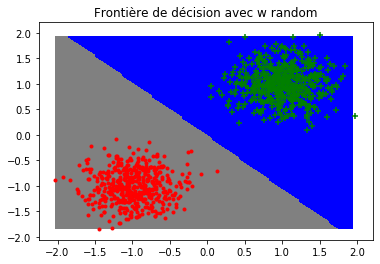

In [23]:
ut.get_frontiere(datax,datay)

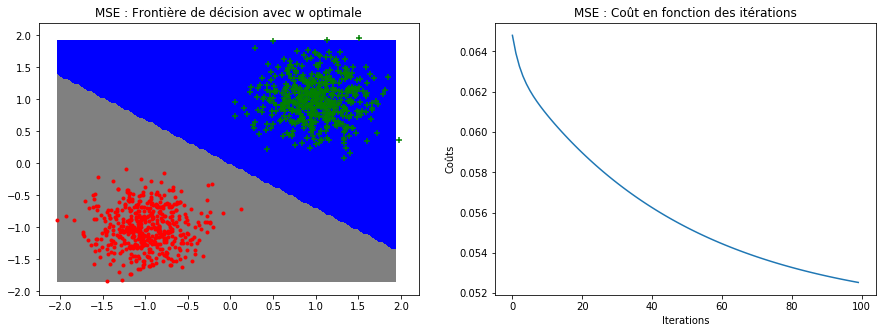

In [24]:
ut.get_frontiere(datax,datay,f="mse")

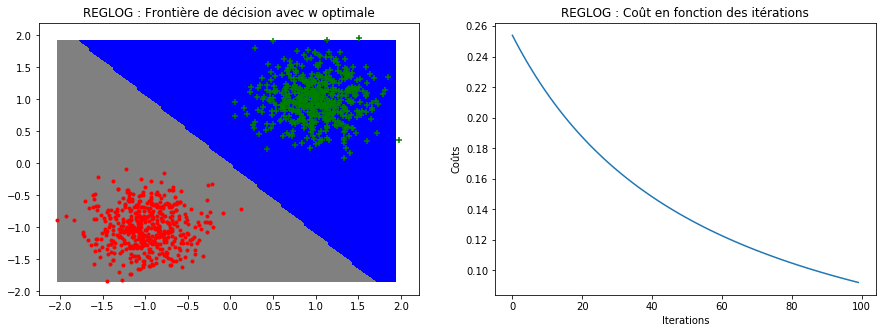

In [25]:
ut.get_frontiere(datax,datay,f="reglog")

    on remarque clairement que le cout diminue avec chaque iteration et tend vers zero, ce qui est logique. et la frontiere de mse et reglog separe notre dataset en deux classes contrairement au random.

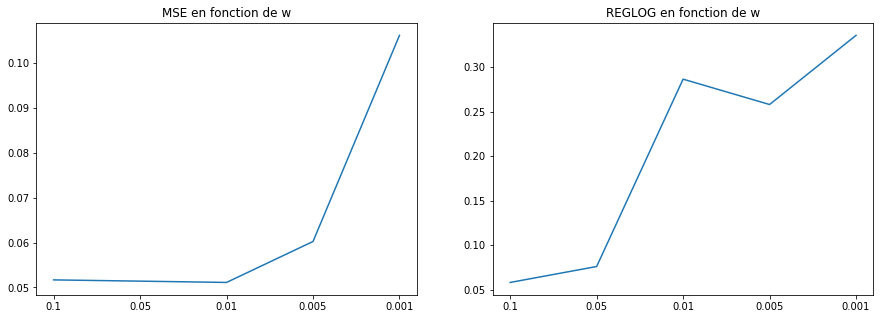

In [26]:
ut.get_cost_by_eps(datax,datay)

     on remarque que pour 100 iteration un bon learning rate serait 0.1, et l'erreur augmante en le diminuant car on converge plus lentement, prenant par exemple eps = 0.9 

In [27]:
w, w_history, loss_history = ut.descente_gradient(datax,datay,ut.mse,ut.mse_grad,0.9,ut.NBITER)
ut.mse(w,datax,datay).mean()

2.9909160120484872e+88

In [28]:
datax_bruit, datay_bruit = ut.gen_arti(epsilon=2)

In [29]:
w, w_history, loss_history = ut.descente_gradient(datax_bruit,datay_bruit,ut.mse,ut.mse_grad,0.9,ut.NBITER)
ut.mse(w,datax,datay).mean()

3.715568503749808e+204

    dans les deux cas de donnée separables ou bruités un grand pas produit des grandes erreurs, par contre un petit pas nous retourne une erreur non optimale mais acceptable en la comparant avec celle d'un grand pas.

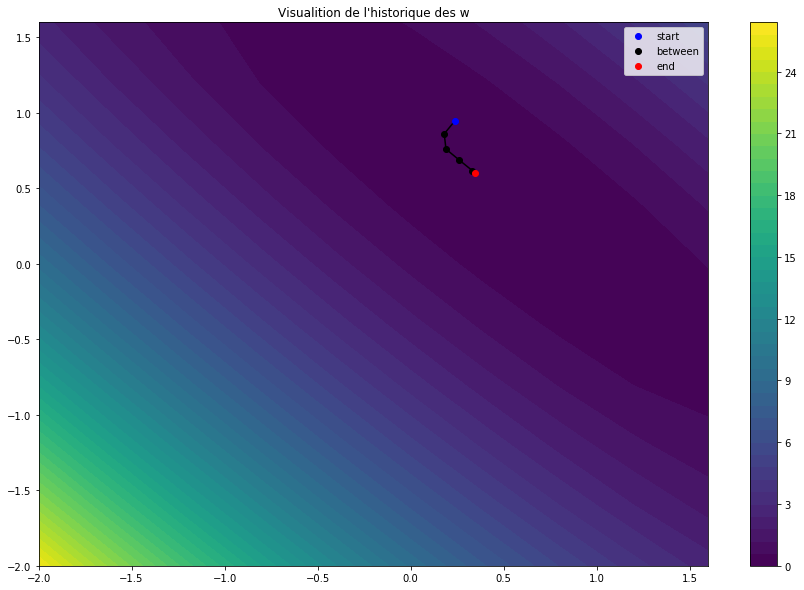

In [30]:
w, w_history, loss_history = ut.descente_gradient(datax,datay,ut.mse,ut.mse_grad,0.05,ut.NBITER)
ut.plot_wHist(datax, datay, ut.mse, w_history)

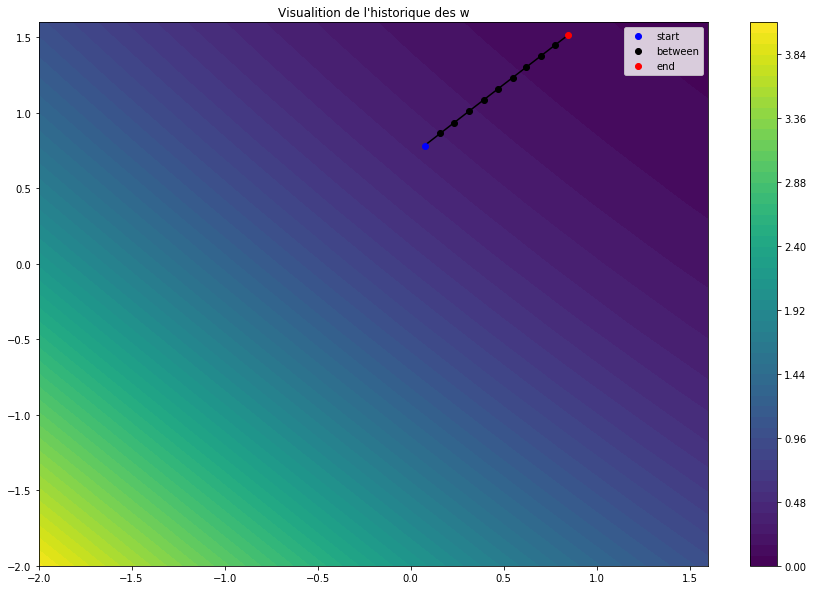

In [31]:
w, w_history, loss_history = ut.descente_gradient(datax,datay,ut.reglog,ut.reglog_grad,0.05,ut.NBITER)
ut.plot_wHist(datax, datay, ut.reglog, w_history)

TME4 - Perceptron
--------


TME5 - SVM
--------


<font color="RED" size="+1">Module scikit-learn</font>

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
trainx, trainy = ut.gen_arti(nbex=500, data_type=1, epsilon=0.4)
testx, testy = ut.gen_arti(nbex=500, data_type=1, epsilon=0.4)

Score Perceptron : train 0.524, test 0.52
Score KNN : train 0.956, test 0.94
Score Tree : train 1.0, test 0.936


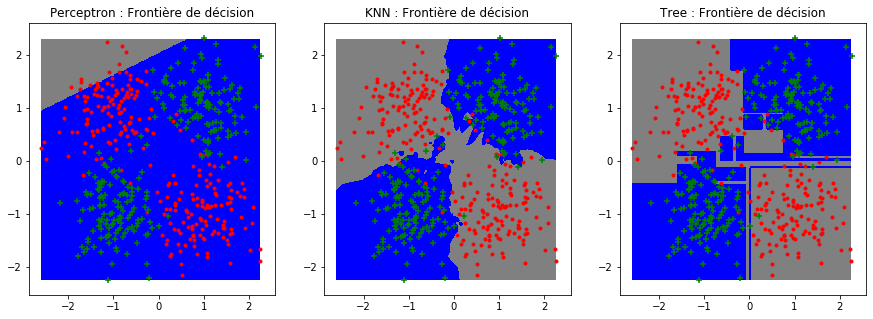

In [5]:
ut.plot_sklearn_models(trainx, testx, trainy, testy)

<font color="RED" size="+1">Linéaire pénalisé - régularisation de Tikhonov</font>

Score 9 vs all perceptron simple : train 0.8, test 0.75375
Score 9 vs all perceptron regularisé : train 0.8675, test 0.8225
Score SVM 9 vs all : train 0.994, test 0.94


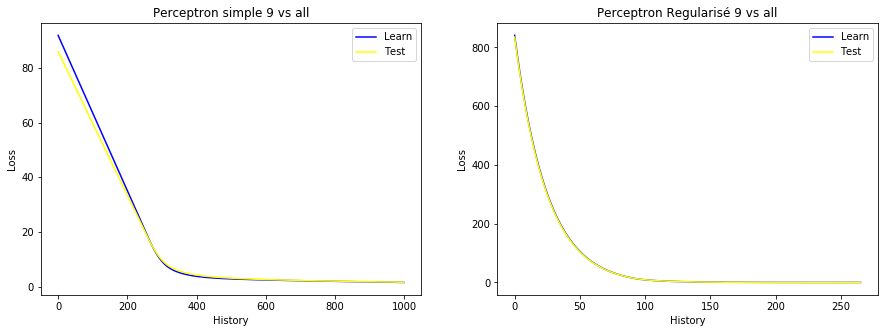

In [4]:
ut.plot_perceptron_MNIST()

    on remarque que le perceptron regularisé est plus precis que le simple, ce qui est logique car la regularisation de Tikhonov nous permet d'eviter le sur-apprentissage. on voit aussi qu'il est plus rapide car trouve un w optimale au bout de 250 iteration au lieu de 1000. D'autre coté le SVM est le plus efficace avec 94% de score pour le test

<font color="RED" size="+1">SVM et Grid Search</font>

{'C': 2.0, 'kernel': 'linear', 'max_iter': 1000, 'probability': True, 'shrinking': True}
Score SVM : train 0.668, test 0.666


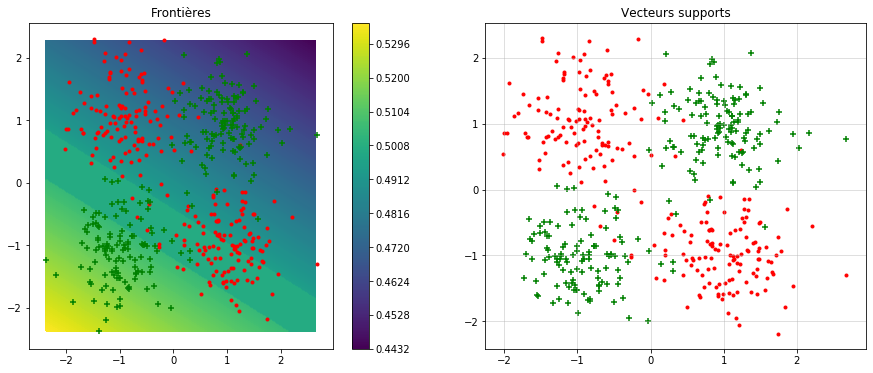

In [9]:
params = ut.grid_search(trainx, trainy, testx, testy,kernel='linear')
print(params)
ut.plot_svm_alea(params)

{'C': 10.0, 'coef0': 1.0, 'degree': 3, 'gamma': 0.01, 'kernel': 'poly', 'max_iter': 1000, 'probability': True, 'shrinking': True}
Score SVM : train 0.954, test 0.938


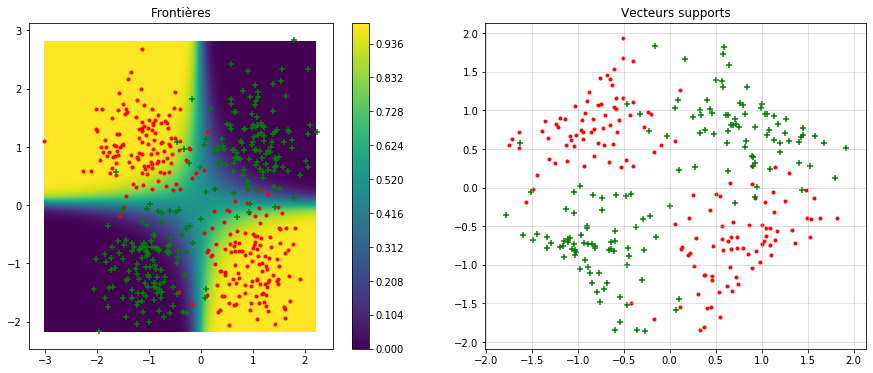

In [10]:
params = ut.grid_search(trainx, trainy, testx, testy,kernel='poly')
print(params)
ut.plot_svm_alea(params)

{'C': 2.0, 'coef0': -1.0, 'gamma': 'scale', 'kernel': 'sigmoid', 'max_iter': 1000, 'probability': True, 'shrinking': True}
Score SVM : train 0.938, test 0.962


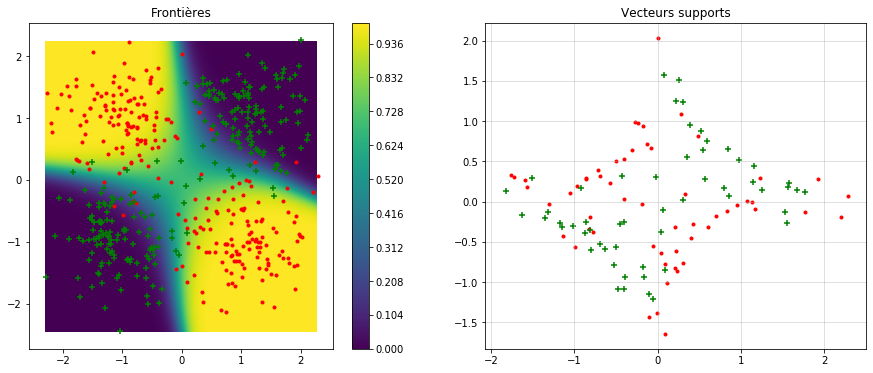

In [11]:
params = ut.grid_search(trainx, testx, trainy, testy,kernel='sigmoid')
print(params)
ut.plot_svm_alea(params)

{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 1000, 'probability': True, 'shrinking': True}
Score SVM : train 0.946, test 0.95


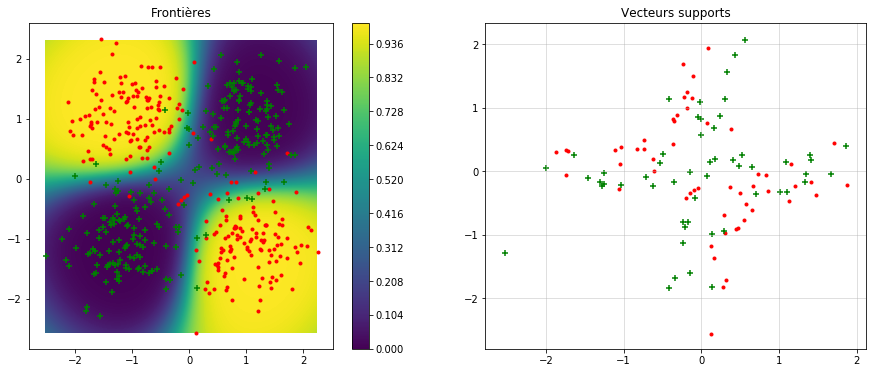

In [12]:
params = ut.grid_search(trainx, trainy, testx, testy,kernel='rbf')
print(params)
ut.plot_svm_alea(params)

    apres avoir fait un grid search on utilise les classifieurs avec chaque kernel, pour poly , rbf et sigmoid on remarque des resultats plus elevé que celle de linear, ce qui est logique car le probleme n'est pas separable lineairement, les parametre optimaux de chaque classifieur sont afficher ci-dessus.

<font color="RED" size="+1">Apprentissage multi-classe</font>

Score (one-vs-rest) : train 0.9805, test 0.90875


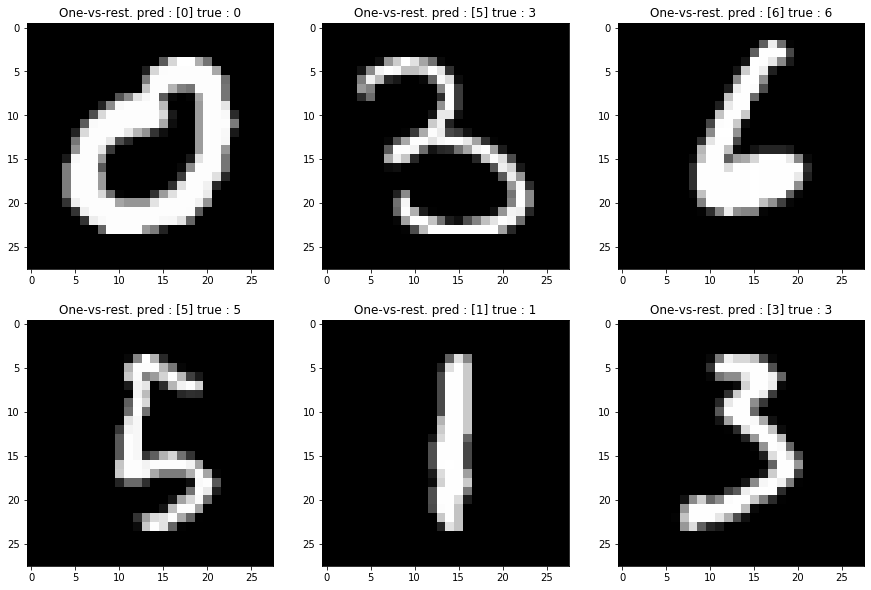

In [3]:
ut.pred_mnist_one_vs_all()

Score (one-vs-one) : train 0.9825, test 0.9075


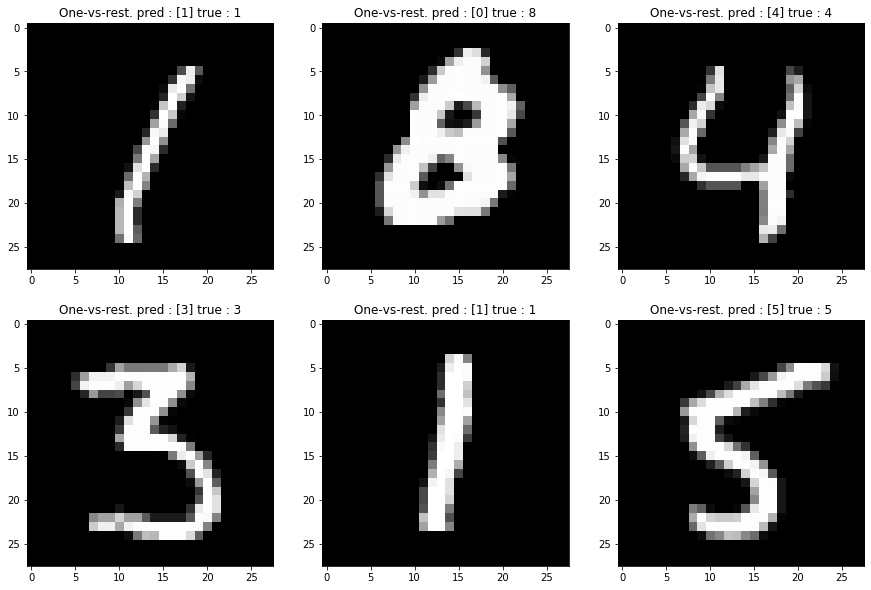

In [4]:
ut.pred_mnist_one_vs_one()

    apres avoir lancer les deux methodes one vs all et one vs one, on arrive a la conclusion que les scores sont presque identique (avec une difference negligable). en terme de temps d'execution one vs one prends enormement de temps par rapport a one vs all, par consequant il est plus preferable d'utiliser ce dernier.

<font color="RED" size="+1">String Kernel</font>

In [5]:
text = ['eat pizza','eat frozen pizza','eat meat','frozen water','no meat diet','drink water','nothing at all']

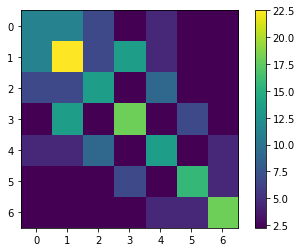

In [9]:
mat = ut.getSimMat(text,4,0.5)
ut.plt.imshow(mat)
ut.plt.colorbar()

Score SVM StringKernel : train 1.0, test 0.625


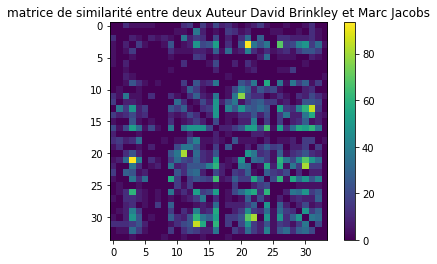

In [5]:
ut.plot_svm_stringKernal()